# **1- Data Loading and Preprocessing**

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json. ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json.': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Download the BRATS dataset
!kaggle datasets download -d nodoubttome/skin-cancer9-classesisic

Benign =[Dermatofibroma
Nevus
Pigmented Benign Keratosis
Seborrheic Keratosis
Vascular Lesion]
Cancerous  =[
Actinic Keratosis (Precancerous)
Basal Cell Carcinoma
Melanoma
Squamous Cell Carcinoma]

Dataset URL: https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic
License(s): other
100% 784M/786M [00:41<00:00, 20.4MB/s]
100% 786M/786M [00:41<00:00, 19.7MB/s]


In [ ]:
%mkdir /content/ISIC

In [ ]:

!unzip /content/skin-cancer9-classesisic.zip -d ./ISIC/

Archive:  /content/skin-cancer9-classesisic.zip
  inflating: ./ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: ./ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: ./ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: ./ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: ./ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: ./ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: ./ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: ./ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Te

In [ ]:
import os
import pandas as pd
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
def data(dataset_path):
    images = []
    labels = []
    for folder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, folder)
        for subfolder in os.listdir(subfolder_path):
            subfolder_path1 = os.path.join(subfolder_path, subfolder)
            if not os.path.isdir(subfolder_path):
                continue
            for image_filename in os.listdir(subfolder_path1):
                if image_filename.endswith(".jpg"):
                    image_path = os.path.join(subfolder_path1, image_filename)
                    images.append(image_path)
                    labels.append(subfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df

In [ ]:
#train
train=data('/content/ISIC/Skin cancer ISIC The International Skin Imaging Collaboration')
train.head()

image                    label
0  /content/ISIC/Skin cancer ISIC The Internation...  squamous cell carcinoma
1  /content/ISIC/Skin cancer ISIC The Internation...  squamous cell carcinoma
2  /content/ISIC/Skin cancer ISIC The Internation...  squamous cell carcinoma
3  /content/ISIC/Skin cancer ISIC The Internation...  squamous cell carcinoma
4  /content/ISIC/Skin cancer ISIC The Internation...  squamous cell carcinoma

<ipython-input-9-245a707cfe18>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train.label, ax=ax, palette='Set2')
<ipython-input-9-245a707cfe18>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


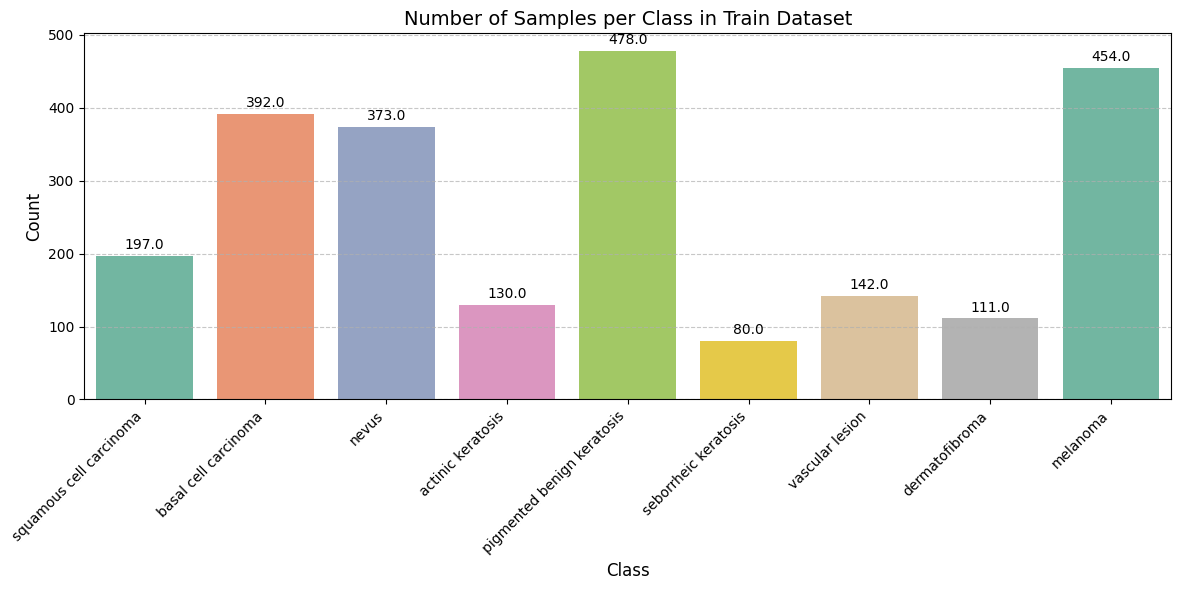

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the count of samples for each class
sns.countplot(x=train.label, ax=ax, palette='Set2')

# Set axis labels and title
ax.set_xlabel("Class", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Number of Samples per Class in Train Dataset", fontsize=14)

# Rotate x-tick labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Annotate the bars with the count of samples
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add a grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


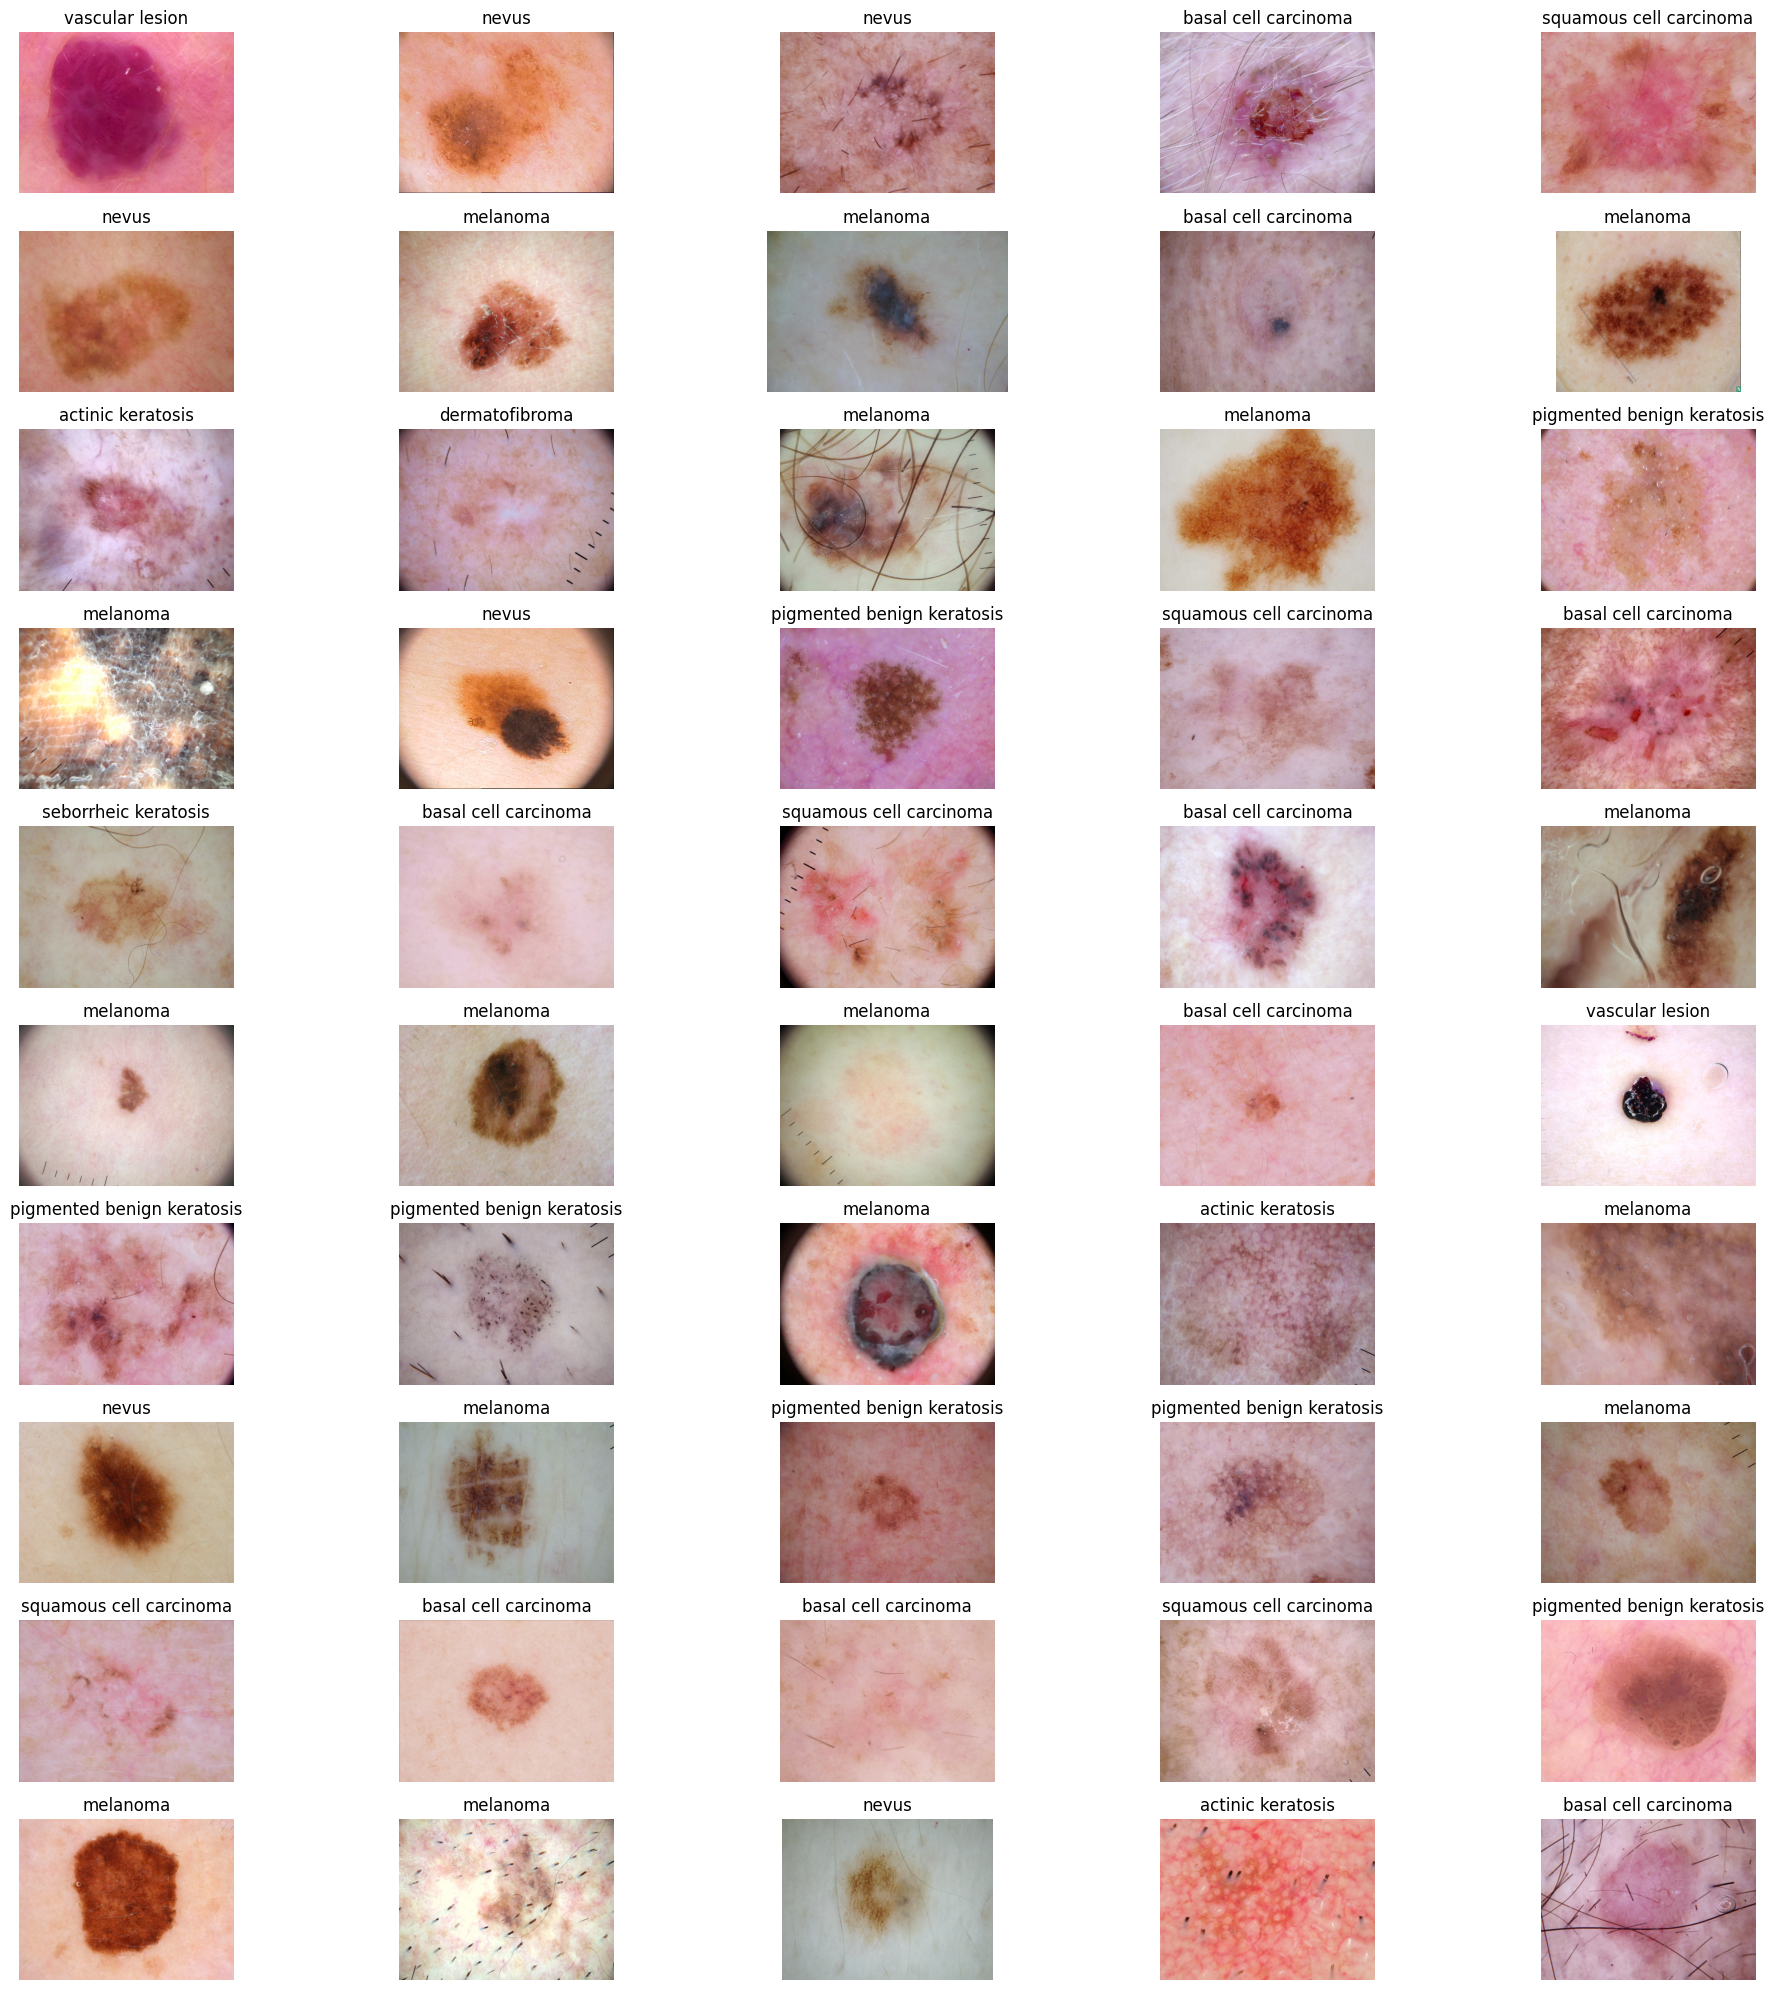

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Define the number of rows and columns
rows, cols = 10, 5
num_images = rows * cols

# Set up the figure
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

# Randomly select 50 images without repetition
random_indices = np.random.choice(len(train), num_images, replace=False)

# Plot each selected image
for n, idx in enumerate(random_indices):
    row = n // cols
    col = n % cols

    # Read and convert the image to RGB
    img = cv2.imread(train.image[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image in the corresponding subplot
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    axes[row, col].set_title(train.label[idx], fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
%mkdir /content/ISIC/Train/Benign

In [ ]:
import os
import shutil

# Paths
old_train_path = "/content/ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
old_test_path = "/content/ISIC/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
new_train_path = "/content/drive/MyDrive/ISIC/Train"
new_test_path = "/content/drive/MyDrive/ISIC/Test"

# Class Categories
benign_classes = ['dermatofibroma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'vascular lesion']
cancerous_classes = ['actinic keratosis', 'basal cell carcinoma', 'melanoma', 'squamous cell carcinoma']

# Step 1: Create the new directory structure
os.makedirs(f"{new_train_path}/Benign", exist_ok=True)
os.makedirs(f"{new_test_path}/Benign", exist_ok=True)

# Create folders for each cancerous class in the test set
for cancer_class in cancerous_classes:
    os.makedirs(f"{new_test_path}/{cancer_class.replace(' ', '_')}", exist_ok=True)

# Step 2: Copy Benign images from old Train to new Train 'Benign' folder
print("Copying benign images to new Train folder...")
for benign_class in benign_classes:
    benign_train_dir = os.path.join(old_train_path, benign_class)
    for img_name in os.listdir(benign_train_dir):
        src_path = os.path.join(benign_train_dir, img_name)
        dst_path = os.path.join(f"{new_train_path}/Benign", img_name)
        shutil.copy(src_path, dst_path)

# Step 3: Copy Benign images from old Test to new Test 'Benign' folder
print("Copying benign images to new Test folder...")
for benign_class in benign_classes:
    benign_test_dir = os.path.join(old_test_path, benign_class)
    for img_name in os.listdir(benign_test_dir):
        src_path = os.path.join(benign_test_dir, img_name)
        dst_path = os.path.join(f"{new_test_path}/Benign", img_name)
        shutil.copy(src_path, dst_path)

# Step 4: Copy Cancerous images from old Train and Test folders to new Test folders
print("Copying cancerous images to new Test folders...")
for cancer_class in cancerous_classes:
    # Copy from old Train folder to new Test cancerous folder
    cancer_train_dir = os.path.join(old_train_path, cancer_class)
    new_test_cancer_dir = f"{new_test_path}/{cancer_class.replace(' ', '_')}"

    for img_name in os.listdir(cancer_train_dir):
        src_path = os.path.join(cancer_train_dir, img_name)
        dst_path = os.path.join(new_test_cancer_dir, img_name)
        shutil.copy(src_path, dst_path)

    # Copy from old Test folder to new Test cancerous folder
    cancer_test_dir = os.path.join(old_test_path, cancer_class)

    for img_name in os.listdir(cancer_test_dir):
        src_path = os.path.join(cancer_test_dir, img_name)
        dst_path = os.path.join(new_test_cancer_dir, img_name)
        shutil.copy(src_path, dst_path)

print("Dataset restructuring complete!")


Train Set Image Counts:
Class: Benign, Number of images: 1130

Total images in Train Set: 1130

Test Set Image Counts:
Class: actinic keratosis, Number of images: 130
Class: basal cell carcinoma, Number of images: 392
Class: melanoma, Number of images: 454
Class: squamous cell carcinoma, Number of images: 197
Class: Benign, Number of images: 54
Class: actinic_keratosis, Number of images: 130
Class: basal_cell_carcinoma, Number of images: 392
Class: squamous_cell_carcinoma, Number of images: 197

Total images in Test Set: 1946


In [ ]:
import os
# Paths to train and test datasets
new_train_path = "/content/drive/MyDrive/ISIC/Train"
new_test_path = "/content/drive/MyDrive/ISIC/Test"

# Function to count images in a folder
def count_images_in_folder(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Count images in each class of the train set
print("Train Set Image Counts:")
train_classes = os.listdir(new_train_path)
total_train_images = 0
for train_class in train_classes:
    class_path = os.path.join(new_train_path, train_class)
    num_images = count_images_in_folder(class_path)
    total_train_images += num_images
    print(f"Class: {train_class}, Number of images: {num_images}")

print(f"\nTotal images in Train Set: {total_train_images}\n")

# Count images in each class of the test set
print("Test Set Image Counts:")
test_classes = os.listdir(new_test_path)
total_test_images = 0
for test_class in test_classes:
    class_path = os.path.join(new_test_path, test_class)
    num_images = count_images_in_folder(class_path)
    total_test_images += num_images
    print(f"Class: {test_class}, Number of images: {num_images}")

print(f"\nTotal images in Test Set: {total_test_images}")


Train Set Image Counts:
Class: Benign, Number of images: 930

Total images in Train Set: 930

Test Set Image Counts:
Class: Benign, Number of images: 254
Class: Cancerous, Number of images: 1173

Total images in Test Set: 1427


In [ ]:
import os
import shutil

# Source directories
source_dirs = [
    "/content/drive/MyDrive/ISIC/Test/basal_cell_carcinoma",
    "/content/drive/MyDrive/ISIC/Test/melanoma",
    "/content/drive/MyDrive/ISIC/Test/squamous_cell_carcinoma"
]

# Destination directory
destination_dir = "/content/drive/MyDrive/ISIC/Test/Cancerous"

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Move all images from the source directories to the destination
for source_dir in source_dirs:
    for filename in os.listdir(source_dir):
        # Construct full file paths
        source_file = os.path.join(source_dir, filename)
        destination_file = os.path.join(destination_dir, filename)

        # Move the file
        if os.path.isfile(source_file):
            shutil.move(source_file, destination_file)
            print(f"Moved: {source_file} -> {destination_file}")

print("All files moved successfully!")


Moved: /content/drive/MyDrive/ISIC/Test/basal_cell_carcinoma/ISIC_0029564.jpg -> /content/drive/MyDrive/ISIC/Test/Cancerous/ISIC_0029564.jpg
Moved: /content/drive/MyDrive/ISIC/Test/basal_cell_carcinoma/ISIC_0029747.jpg -> /content/drive/MyDrive/ISIC/Test/Cancerous/ISIC_0029747.jpg
Moved: /content/drive/MyDrive/ISIC/Test/basal_cell_carcinoma/ISIC_0028653.jpg -> /content/drive/MyDrive/ISIC/Test/Cancerous/ISIC_0028653.jpg
Moved: /content/drive/MyDrive/ISIC/Test/basal_cell_carcinoma/ISIC_0031063.jpg -> /content/drive/MyDrive/ISIC/Test/Cancerous/ISIC_0031063.jpg
Moved: /content/drive/MyDrive/ISIC/Test/basal_cell_carcinoma/ISIC_0028303.jpg -> /content/drive/MyDrive/ISIC/Test/Cancerous/ISIC_0028303.jpg
Moved: /content/drive/MyDrive/ISIC/Test/basal_cell_carcinoma/ISIC_0031294.jpg -> /content/drive/MyDrive/ISIC/Test/Cancerous/ISIC_0031294.jpg
Moved: /content/drive/MyDrive/ISIC/Test/basal_cell_carcinoma/ISIC_0030403.jpg -> /content/drive/MyDrive/ISIC/Test/Cancerous/ISIC_0030403.jpg
Moved: /conte

# **2. Train and Evaluate OCAD**

In [ ]:
from utils.data_loader import create_data_generator
# Create data generators for training and testing datasets
# Paths for training and testing datasets
TRAIN_DIR = '/content/drive/MyDrive/ISIC/Train/'
TEST_DIR = '/content/drive/MyDrive/ISIC/Test/'
train_generator = create_data_generator(
    directory=TRAIN_DIR,
    class_mode=None,  # One-class training for anomaly detection
    shuffle=True,
    augment=True
)

test_generator = create_data_generator(
    directory=TEST_DIR,
    class_mode="binary",
    shuffle=True,
    classes=['Benign', 'Cancerous']
)

Found 930 images belonging to 1 classes.
Found 1427 images belonging to 2 classes.


In [ ]:
%%writefile /content/drive/MyDrive/OCAD/src/train.py

import os
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from models.anomaly_detection_model import AnomalyDetectionModel
from utils.data_loader import create_data_generator
from models.autoencoder import build_autoencoder, build_encoder,build_decoder,build_critic
from utils.callbacks import SaveBestF1Callback
import warnings

# Set TensorFlow logger level
tf.get_logger().setLevel('ERROR')

SAVE_MODEL_PATH = '/content/drive/MyDrive/OCAD/models/best_anomaly_detection_model.keras'

# Training constants
IMG_HEIGHT, IMG_WIDTH = 176, 176
BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 1e-4




# Initialize the autoencoder model components
autoencoder_model, encoder, decoder, anomaly_classifier, critic = build_autoencoder()

# Initialize and compile the Anomaly Detection Model
anomaly_detection_model = AnomalyDetectionModel(autoencoder_model=autoencoder_model, critic=critic)
anomaly_detection_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE))

# Set up callbacks for training
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6)
save_best_callback = SaveBestF1Callback(anomaly_detection_model, test_generator, save_path=SAVE_MODEL_PATH)

callbacks = [early_stopping, lr_scheduler, save_best_callback]

# Start training
history = anomaly_detection_model.fit(
    train_generator,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

print("Training completed. Best model saved to:", SAVE_MODEL_PATH)



Epoch 1/100
Threshold updated: Tensor("truediv_2:0", shape=(), dtype=float32)
Threshold updated: Tensor("truediv_2:0", shape=(), dtype=float32)
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - loss: 0.2197 Accuracy: 0.8750, Precision: 0.8750, Recall: 1.0000, F1-Score: 0.9333
F1 improved from 0.0000 to 0.9333. Saving model...


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_api.py:102: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 511ms/step - loss: 0.2127 - learning_rate: 1.0000e-04
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - loss: 0.1857 Accuracy: 0.8750, Precision: 0.8750, Recall: 1.0000, F1-Score: 0.9333
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 408ms/step - loss: 0.1797 - learning_rate: 1.0000e-04
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - loss: 0.1603 Accuracy: 0.8125, Precision: 0.8125, Recall: 1.0000, F1-Score: 0.8966
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 412ms/step - loss: 0.1552 - learning_rate: 1.0000e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - loss: 0.1375 Accuracy: 0.8125, Precision: 0.8125, Recall: 1.0000, F1-Score: 0.8966
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 407ms/step - loss: 0.1331 - learning_rate: 1.0000e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - loss: 0.1269 Accuracy: 0.9062, Precision: 0.9062, Recall: 1.0000, F1-Score: 0.9508
F1 improved from 0.9333 to 0.9508. Saving model...


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_api.py:102: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 433ms/step - loss: 0.1228 - learning_rate: 1.0000e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - loss: 0.1189 Accuracy: 0.9062, Precision: 0.9062, Recall: 1.0000, F1-Score: 0.9508
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 428ms/step - loss: 0.1151 - learning_rate: 1.0000e-04
Epoch 7/100


KeyboardInterrupt: 

# **3. Visualize Results**

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


15
Bacth: 0
Bacth: 1
Bacth: 2
Bacth: 3
Bacth: 4
Bacth: 5
Bacth: 6
Bacth: 7
Bacth: 8
Bacth: 9
Bacth: 10
Bacth: 11
Bacth: 12
Bacth: 13
Bacth: 14
Bacth: 15
threshold: 0.0006163559155538678
testing batches: 23
Bacth: 0
Batch 0  Anomaly 0.0013175888452678919
Bacth: 1
Batch 1  Anomaly 0.0010493391891941428
Bacth: 2
Batch 2  Anomaly 0.0012069359654560685
Bacth: 3
Batch 3  Anomaly 0.0011173950042575598
Bacth: 4
Batch 4  Anomaly 0.001311055151745677
Bacth: 5
Batch 5  Anomaly 0.0011878538643941283
Bacth: 6
Batch 6  Anomaly 0.0011833731550723314
Bacth: 7
Batch 7  Anomaly 0.0012921123998239636
Bacth: 8
Batch 8  Anomaly 0.0010615019127726555
Bacth: 9
Batch 9  Anomaly 0.0014914085622876883
Bacth: 10
Batch 10  Anomaly 0.001212936476804316
Bacth: 11
Batch 11  Anomaly 0.001059443224221468
Bacth: 12
Batch 12  Anomaly 0.0010165085550397635
Bacth: 13
Batch 13  Anomaly 0.0013594580814242363
Bacth: 14
Batch 14  Anomaly 0.0011804988607764244
Bacth: 15
Batch 15  Anomaly 0.0013860913459211588
Bacth: 16
Batch 1

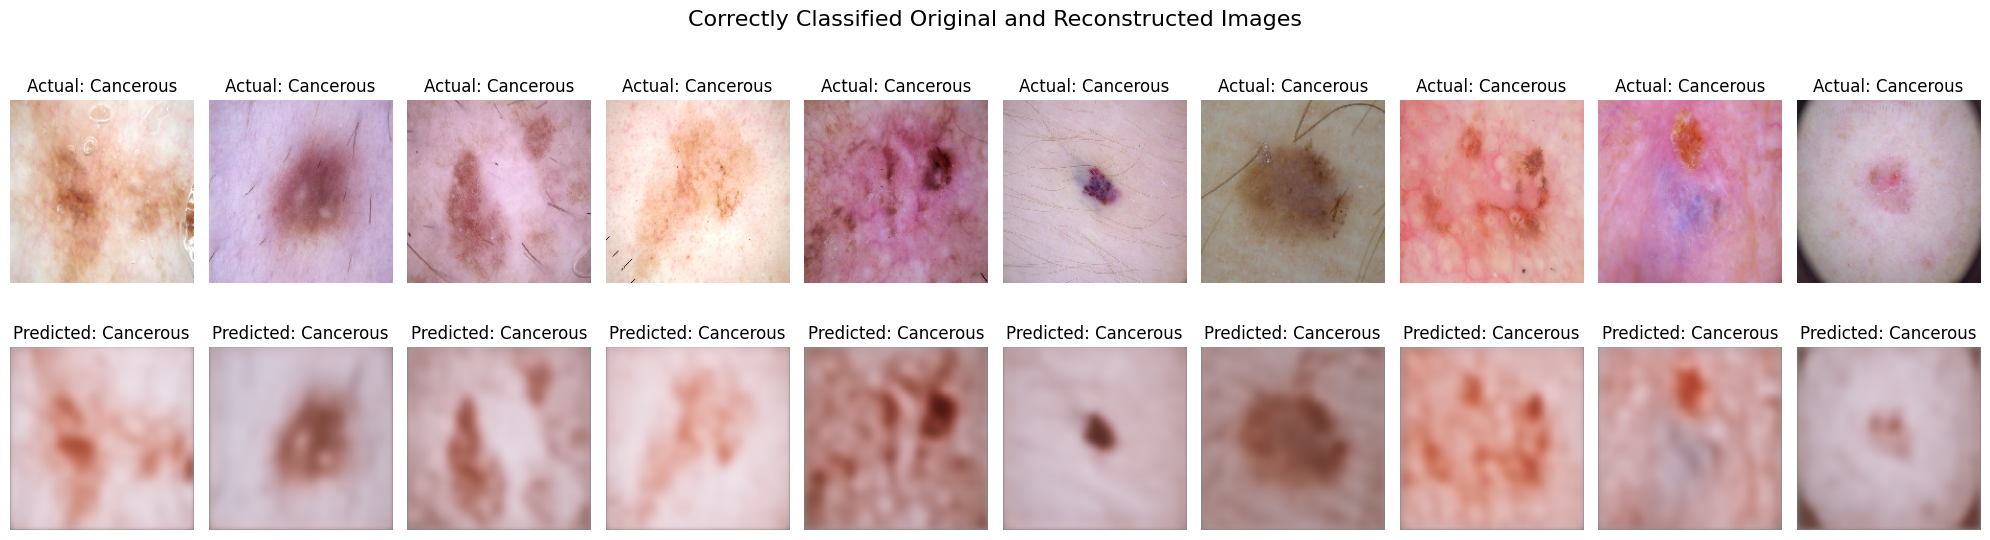

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_threshold(anomaly_detection_model, train_generator):
    """
    Calculates the threshold for anomaly detection based on the entire training set.
    """
    all_mse_train = []
    all_critic_out_train = []
    all_mean_anomaly_train = []
    batches=0
    n= len(train_generator)
    print(n)



    # Iterate over the entire training set
    for x_train_batch in train_generator:
        print(f'Bacth: {batches}')
        x2_sample = x_train_batch  # Duplicate for feeding as the second input if required by the model
        x_reconstructed, critic_out, anomaly_score_z1, anomaly_score_z2 = anomaly_detection_model.autoencoder_model([x_train_batch, x2_sample], training=False)

        mse_batch = np.mean(np.square(x_train_batch - x_reconstructed), axis=(1, 2, 3))
        critic_out_batch = critic_out.numpy().ravel()
        anomaly_score_batch = (anomaly_score_z1 + anomaly_score_z2) / 2
        mean_anomaly_batch = np.mean(anomaly_score_batch, axis=(1, 2))

        # Accumulate metrics across all batches
        all_mse_train.extend(mse_batch)
        all_critic_out_train.extend(critic_out_batch)
        all_mean_anomaly_train.extend(mean_anomaly_batch)
        if batches>=n:
          break
        batches+=1

    # Convert lists to arrays for further processing
    all_mse_train = np.array(all_mse_train)
    all_critic_out_train = np.array(all_critic_out_train)
    all_mean_anomaly_train = np.array(all_mean_anomaly_train)

    # Calculate the threshold as the mean value
    threshold =  np.mean(all_mean_anomaly_train)#+np.std(all_critic_out_train+ all_mean_anomaly_train)
    # threshold = np.mean(all_mse_train )+np.std(all_mse_train )+ np.mean(all_mean_anomaly_train)+np.std(all_mean_anomaly_train)

    print(f'threshold: {threshold}')
    return threshold

def evaluate(anomaly_detection_model, train_generator, test_generator, visualize=False):
    """
    Evaluates the model on the test set and calculates accuracy, precision, recall, and F1-score.
    """
    # Calculate threshold based on the training set
    threshold = calculate_threshold(anomaly_detection_model, train_generator)

    all_true_labels = []
    all_predicted_labels = []
    batches=0
    n=len(test_generator)
    print(f'testing batches: {n}')

    # Evaluate on the entire test set

    for x_test_batch, true_labels in test_generator:
        print(f'Bacth: {batches}')
        x2_sample = x_test_batch  # Duplicate for feeding as the second input
        x_reconstructed, critic_out, anomaly_score_z1, anomaly_score_z2 = anomaly_detection_model.autoencoder_model([x_test_batch, x2_sample], training=False)

        mse = np.mean(np.square(x_test_batch - x_reconstructed), axis=(1, 2,3))
        anomaly_score = (anomaly_score_z1+ anomaly_score_z2) / 2
        critic_out = critic_out.numpy().ravel()
        anomaly = (np.mean(anomaly_score, axis=(1, 2))+critic_out)/2
        print(f'Batch {batches}  Anomaly {np.mean(anomaly)}')

        # Compute predicted labels based on the threshold
        predicted_labels = (anomaly >= threshold).astype(int)

        # Accumulate true and predicted labels
        all_true_labels.extend(true_labels)
        all_predicted_labels.extend(predicted_labels)
        if batches>=n:
          break
        batches+=1

    # Calculate evaluation metrics
    print(len(all_true_labels))
    accuracy = accuracy_score(all_true_labels, all_predicted_labels)
    precision = precision_score(all_true_labels, all_predicted_labels)
    recall = recall_score(all_true_labels, all_predicted_labels)
    f1 = f1_score(all_true_labels, all_predicted_labels)

    results = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
    }

    # print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    if visualize:
        # Visualize only correctly classified images
        correct_indices = [i for i in range(len(all_true_labels)) if all_true_labels[i] == all_predicted_labels[i]]
        num_correct = min(len(correct_indices), 10)  # Display up to 10 images

        fig, axes = plt.subplots(2, num_correct, figsize=(20, 6))
        fig.suptitle("Correctly Classified Original and Reconstructed Images", fontsize=16)

        for idx, i in enumerate(correct_indices[:num_correct]):
            # Display original image
            ax = axes[0, idx]
            ax.imshow(x_test_batch[i].reshape(176, 176, 3))
            ax.axis("off")
            ax.set_title(f"Actual: {'Benign' if all_true_labels[i] == 0 else 'Cancerous'}")

            # Display reconstructed image
            ax = axes[1, idx]
            ax.imshow(x_reconstructed[i].numpy().reshape(176, 176, 3))
            ax.axis("off")
            ax.set_title(f"Predicted: {'Benign' if all_predicted_labels[i] == 0 else 'Cancerous'}")

        plt.tight_layout()
        plt.show()

# Example usage:

anomaly_detection_model.load_weights(SAVE_MODEL_PATH)
evaluate(anomaly_detection_model, train_generator, test_generator, visualize=True)
